Autoregressive model from VMLS Section 13.1.2

In [1]:
import numpy as np
from numpy.linalg import cholesky as llt
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica Neue"],
    "font.size": 28,
})
np.random.seed(0)  # To reproduce same random numbers

In [2]:
def forward_substitution(L, b):
    n = L.shape[0]
    x = np.zeros(n)
    for i in range(n):
        x[i] = (b[i] - L[i,:i] @ x[:i])/L[i, i]
    return x

def backward_substitution(U, b):
    n = U.shape[0]
    x = np.zeros(n)
    for i in reversed(range(n)):
        x[i] = (b[i] - U[i,i+1:] @ x[i+1:])/U[i, i]
    return x

def lstsq(A, b):
    M = A.T.dot(A)
    q = A.T.dot(b)
    L = llt(M)
    x = forward_substitution(L, q)
    x = backward_substitution(L.T, x)
    return x, L

In [3]:
def vandermonde(x, p):
    n = len(x)
    V = np.zeros((n, p)) 
    for i in range(n):
        for j in range(p):
            V[i, j] = x[i]**j
    return V

In [4]:
# Hourly temperature at LAX airport in May 2016 in a vector of 
# length 31*24 = 744.  Measurements are hourly at 12:53 AM 
# to 11:53PM.
t = pd.read_csv('temperature_data.csv').squeeze('columns').to_numpy()
N = len(t)

In [5]:
# MSE for previous temperature predictor 
# z_{t+1} = z_{t}
np.sum(np.square(t[1:] - t[:-1]))/(N - 1)

np.float64(1.3461641991924636)

In [6]:
# MSE of previous day predictor
# z_{t+1} = z_{t-23}
np.sum(np.square(t[24:] - t[:-24]))/(N - 24)

np.float64(3.0063888888888908)

In [7]:
# AR Model train
M = 8
y = t[M:]
A = np.column_stack([t[i:i + N - M] for i in reversed(range(M))]) 
theta = lstsq(A, y)[0]

In [8]:
# AR Model predict and MSE
y_pred = A @ theta
np.sum(np.square(y - y_pred))/len(y)

np.float64(1.0260945686802254)

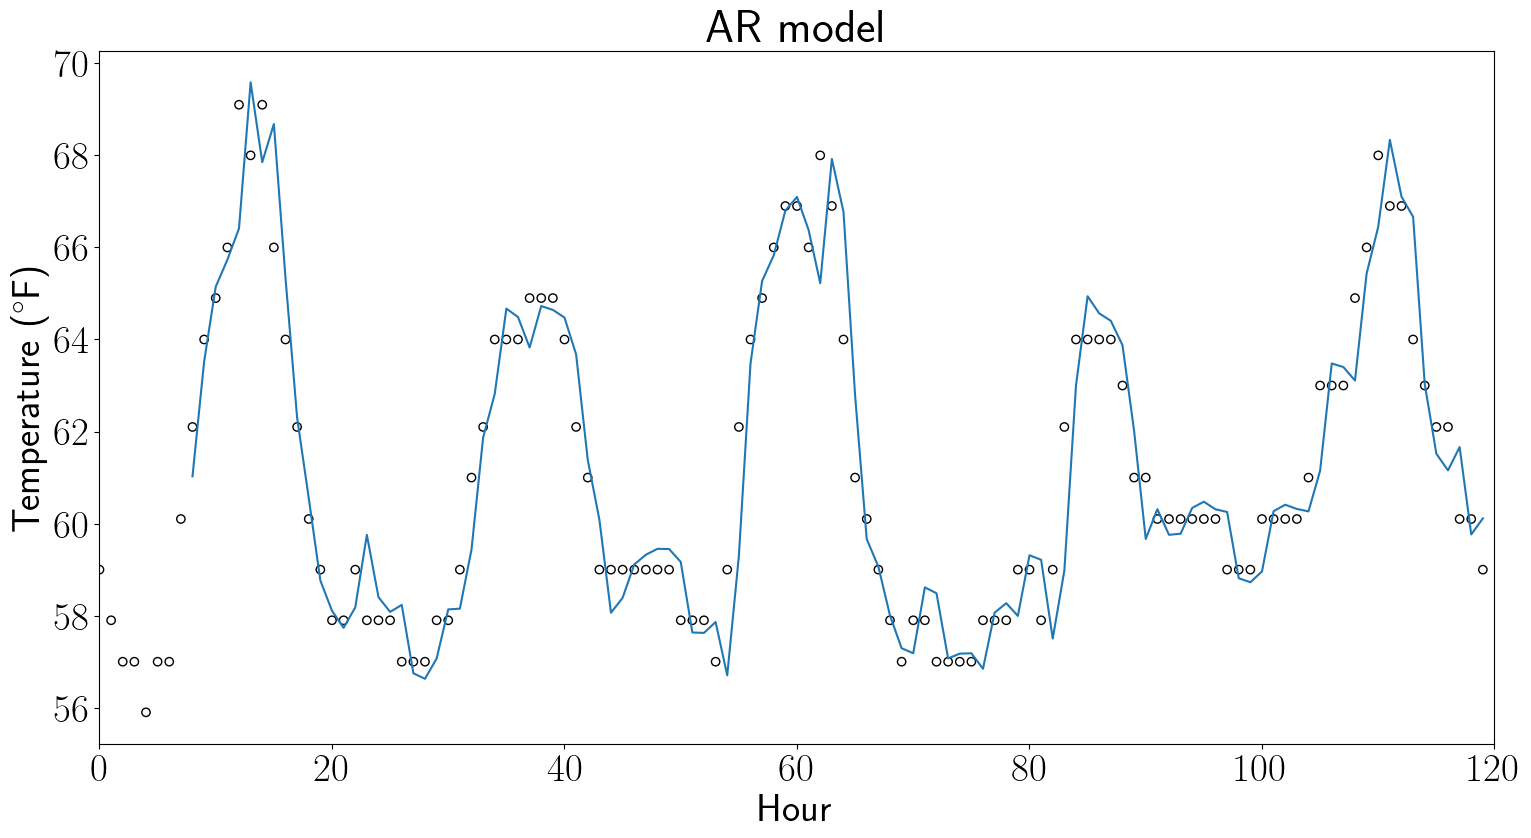

In [9]:
# Plot lines
fig, ax = plt.subplots(1,1, figsize=(18, 9))
N_plot = 24*5  # 5 days hours
plt.scatter(np.arange(N_plot), t[0:N_plot],  marker='o', color='k', facecolors='none') 
plt.plot(np.arange(M, N_plot), y_pred[:N_plot - M]) 
ax.set_xlabel(r'Hour')
ax.set_ylabel(r'Temperature ($^\circ$F)')    
ax.set_xlim([0, N_plot])
ax.set_title(r'AR model')
plt.savefig('ar_fit.pdf')